<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm
import seaborn as sns
import numpy as np

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [3]:
df.dropna(subset=['ConvertedComp'],axis=0,inplace=True)

In [4]:
df['ConvertedComp'].isnull().sum()

0

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


<AxesSubplot:xlabel='ConvertedComp'>

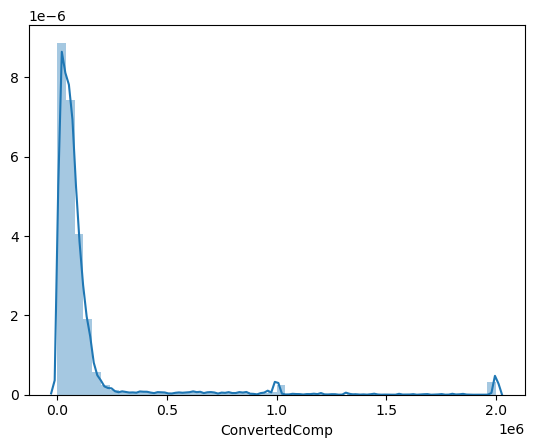

In [5]:
# your code goes here
%matplotlib inline
sns.distplot(df['ConvertedComp'],kde=True)

Plot the histogram for the column `ConvertedComp`.


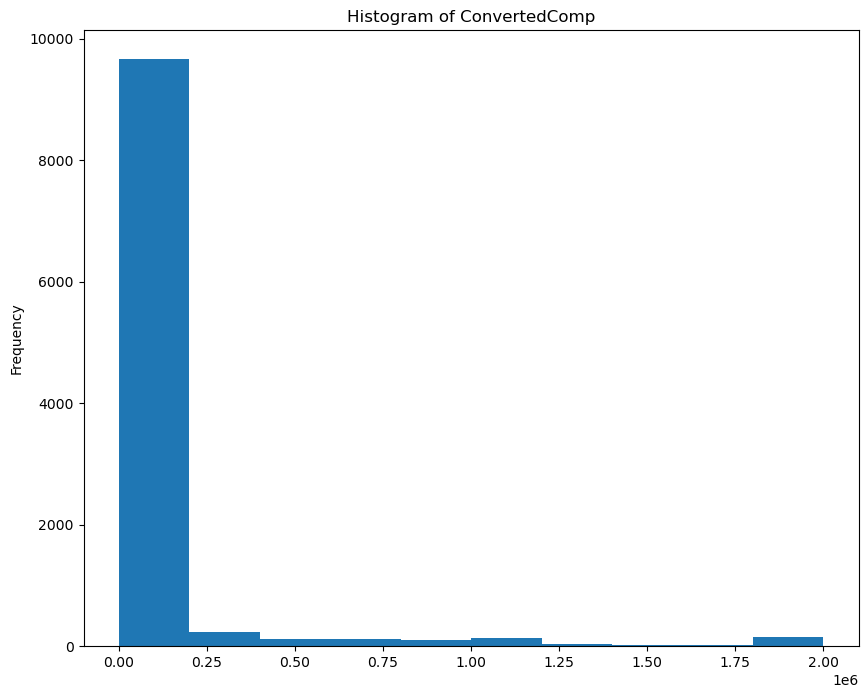

In [6]:
# your code goes here
df['ConvertedComp'].plot(kind='hist', figsize=(10,8))
plt.title('Histogram of ConvertedComp')
plt.show()

What is the median of the column `ConvertedComp`?


In [7]:
# your code goes here
df['ConvertedComp'].median()

57745.0

In [8]:
df['Age'].median()

29.0

##### Median: 57745

How many responders identified themselves only as a **Man**?


In [9]:
# your code goes here
df['Gender'].value_counts()

Man                                                            9725
Woman                                                           679
Non-binary, genderqueer, or gender non-conforming                59
Man;Non-binary, genderqueer, or gender non-conforming            26
Woman;Non-binary, genderqueer, or gender non-conforming          14
Woman;Man                                                         7
Woman;Man;Non-binary, genderqueer, or gender non-conforming       2
Name: Gender, dtype: int64

##### 9725 Male responders

Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [10]:
# your code goes here
df.loc[df['Gender']=='Woman']
df.groupby('Gender')['ConvertedComp'].median()

Gender
Man                                                            57744.0
Man;Non-binary, genderqueer, or gender non-conforming          59520.0
Non-binary, genderqueer, or gender non-conforming              67142.0
Woman                                                          57708.0
Woman;Man                                                      21648.0
Woman;Man;Non-binary, genderqueer, or gender non-conforming    30244.0
Woman;Non-binary, genderqueer, or gender non-conforming        65535.5
Name: ConvertedComp, dtype: float64

##### Female Responders Median: 57708

Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


<AxesSubplot:>

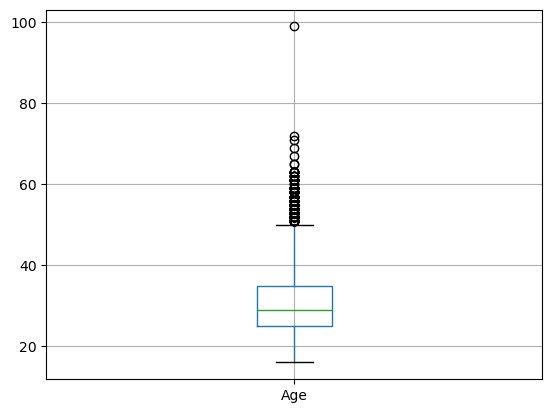

In [11]:
# your code goes here
df.boxplot(column='Age')

In [12]:
df['Age'].describe()

count    10354.000000
mean        30.833040
std          7.389983
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64

Plot a histogram of the column `Age`.


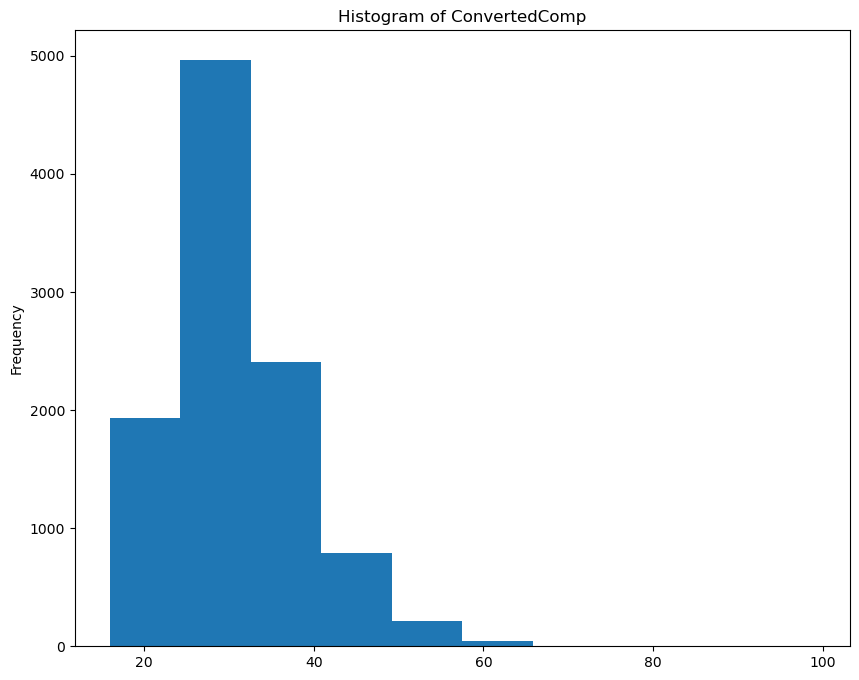

In [13]:
# your code goes here
df['Age'].plot(kind='hist', figsize=(10,8))
plt.title('Histogram of ConvertedComp')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:>

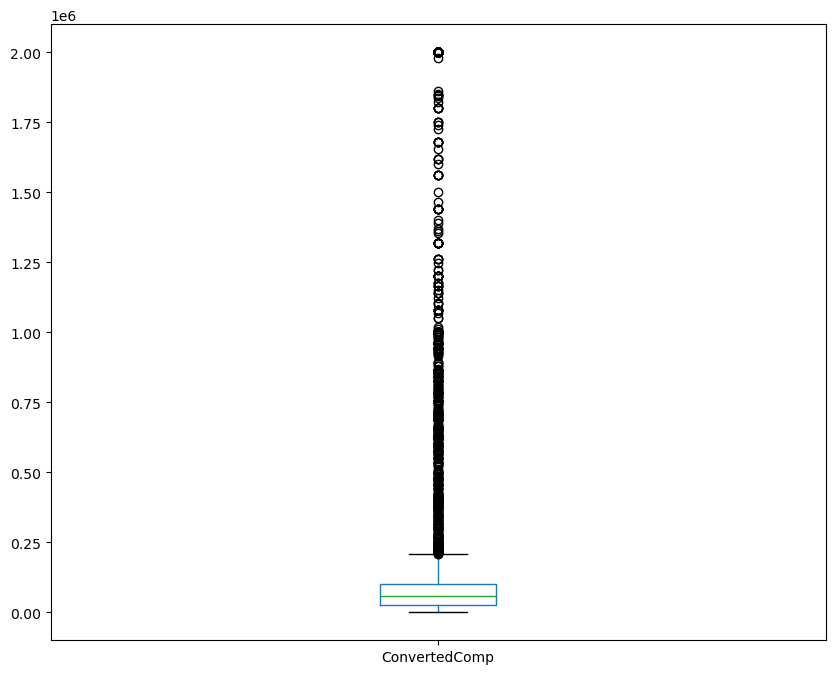

In [14]:
# your code goes here
df['ConvertedComp'].plot(kind='box', figsize=(10,8))

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [15]:
# your code goes here
q1=df['ConvertedComp'].quantile(0.25)
q3=df['ConvertedComp'].quantile(0.75)
iqr=q3-q1
iqr

73132.0

In [21]:
aq1=df['Age'].quantile(0.25)
aq3=df['Age'].quantile(0.75)
aiqr=aq3-aq1
aiqr

10.0

Find out the upper and lower bounds.


In [16]:
# your code goes here
lower=q1-1.5*iqr
upper=q3+1.5*iqr

print('Lower Bound: '+str(lower))
print('Upper Bound: '+str(upper))

Lower Bound: -82830.0
Upper Bound: 209698.0


In [22]:
age_lower=aq1-1.5*aiqr
age_upper=aq3+1.5*aiqr

print('Lower Bound: '+str(age_lower))
print('Upper Bound: '+str(age_upper))

Lower Bound: 10.0
Upper Bound: 50.0


Identify how many outliers are there in the `ConvertedComp` column.


In [17]:
# your code goes here
((df['ConvertedComp']<(lower)) | (df['ConvertedComp']>(upper))).sum()

879

In [23]:
(df['Age']<(age_lower)).sum()

0

In [25]:
(df['Age']>(age_upper)).sum()

207

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [18]:
# your code goes here
DelOut_df=df[(df['ConvertedComp']>(lower))&(df['ConvertedComp']<(upper))]

In [20]:
DelOut_df['ConvertedComp'].median()

52704.0

In [26]:
DelOut_df['ConvertedComp'].mean()

59883.20838915799

## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [19]:
# your code goes here
df.corr()['Age']

Respondent       0.002394
CompTotal        0.006949
ConvertedComp    0.105386
WorkWeekHrs      0.031592
CodeRevHrs      -0.015742
Age              1.000000
Name: Age, dtype: float64

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2023-01-01&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
